Problem Statement-Classify the patients based on the chance of becoming diabetics by analyzing the diagnostic parameters.   

In [1]:

#importing libraries and reading the dataset
import pandas as pd 
import numpy as np 
df = pd.read_csv("diabetes.csv")

In [2]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In the code, we employ a systematic approach to fill missing values, deciding whether to use mean or median based on the characteristics of each column using skew()

In [5]:
#drawing info to check which missing values to be treated with mean and median 
round(df.skew())

Pregnancies                 1.0
Glucose                     0.0
BloodPressure              -2.0
SkinThickness               0.0
Insulin                     2.0
BMI                        -0.0
DiabetesPedigreeFunction    2.0
Age                         1.0
Outcome                     1.0
dtype: float64

Categorizing features for the application of mean and median.

In [6]:

columns_to_mean=['Glucose','SkinThickness','BMI']
columns_to_median=['Pregnancies','BloodPressure','Insulin','DiabetesPedigreeFunction','Age']

In [7]:
#Before zero-fill operation using mean.
for columns in columns_to_mean:
    zeros_counts = (df[columns]==0).sum()
    print(f"number of zeros in {columns}:{zeros_counts}")

number of zeros in Glucose:5
number of zeros in SkinThickness:227
number of zeros in BMI:11


In [8]:
#Fill the zeros with the mean values corresponding to their respective features.
df[columns_to_mean]=df[columns_to_mean].replace(0,pd.NA)
df[columns_to_mean]=df[columns_to_mean].fillna(df[columns_to_mean].mean())


In [9]:
#After zero-fill operation using mean.
for columns in columns_to_mean:
    zeros_counts = (df[columns]==0).sum()
    print(f"number of zeros in {columns}:{zeros_counts}")


number of zeros in Glucose:0
number of zeros in SkinThickness:0
number of zeros in BMI:0


In [10]:
#Before zero-fill operation using median.
for columns in columns_to_median:
    zeros = (df[columns]==0).sum()
    print(f"Number of zeros in '{columns}':{zeros}")

Number of zeros in 'Pregnancies':111
Number of zeros in 'BloodPressure':35
Number of zeros in 'Insulin':374
Number of zeros in 'DiabetesPedigreeFunction':0
Number of zeros in 'Age':0


In [11]:
#Fill the zeros with the median values corresponding to their respective features.
df[columns_to_median]=df[columns_to_median].replace(0,pd.NA)
df[columns_to_median]=df[columns_to_median].fillna(df[columns_to_median].median())

In [12]:
#After zero-fill operation using median.
for columns in columns_to_median:
    zeros = (df[columns]==0).sum()
    print(f"Number of zeros in '{columns}':{zeros}")

Number of zeros in 'Pregnancies':0
Number of zeros in 'BloodPressure':0
Number of zeros in 'Insulin':0
Number of zeros in 'DiabetesPedigreeFunction':0
Number of zeros in 'Age':0


In [13]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.00000,125.0,33.6,0.627,50,1
1,1.0,85.0,66.0,29.00000,125.0,26.6,0.351,31,0
2,8.0,183.0,64.0,29.15342,125.0,23.3,0.672,32,1
3,1.0,89.0,66.0,23.00000,94.0,28.1,0.167,21,0
4,4.0,137.0,40.0,35.00000,168.0,43.1,2.288,33,1


c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

<Axes: xlabel='Outcome', ylabel='count'>

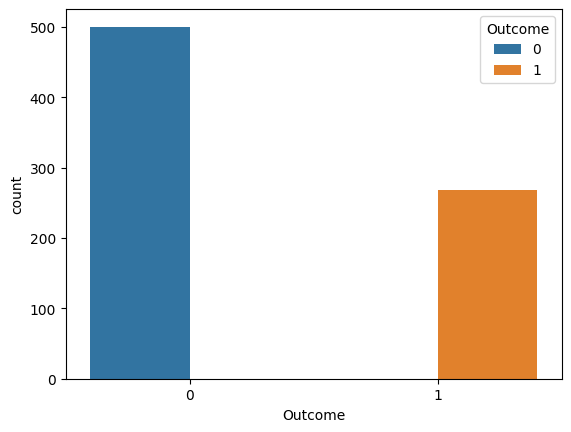

In [14]:
#Checking the class counts.
import seaborn as sns
df['Outcome'].value_counts()
sns.countplot(x='Outcome', data =df,hue='Outcome')



In [15]:
#Extracting input features (X) and corresponding output labels (y) from the DataFrame.
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values


In [16]:
# Splitting the data into training and testing sets.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)


In [17]:
#Standardizing the features using the StandardScaler from sklearn for both training and testing sets.
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train[:,1:] = scalar.fit_transform(X_train[:,1:])
X_test[:,1:]= scalar.transform(X_test[:,1:])

Creating and training a Logistic Regression model using the training data.

In [18]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)


LogisticRegression()

In [19]:
#Predicting the labels for the test set using the trained Logistic Regression model and displaying the predicted and actual labels side by side.
y_pred = log.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]

In [20]:
#Calculating and displaying the confusion matrix and accuracy score for the Logistic Regression model on the test set.
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,classification_report,roc_curve,auc,precision_recall_curve
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_logistic=accuracy_score(y_test,y_pred)
print(accuracy_logistic)


[[82 17]
 [20 35]]
0.7597402597402597


In [21]:
#classification_report for log-reg
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82        99
           1       0.67      0.64      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.76      0.76       154



In [22]:
#Generating the ROC curve and calculating the AUC for the Logistic Regression model.
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, log.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

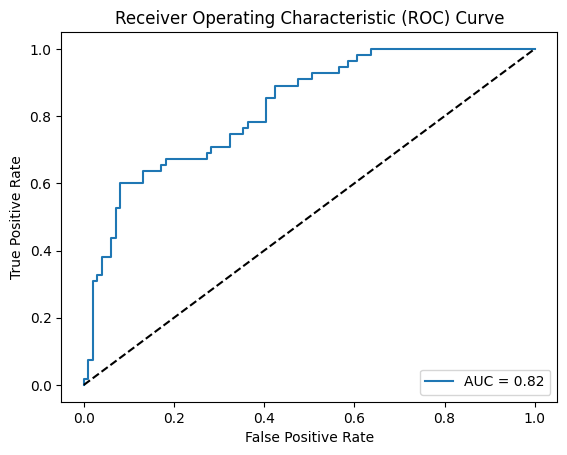

In [23]:

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test,log.predict_proba(X_test)[:, 1])


Creating and training a Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier
model_random_forest = RandomForestClassifier(n_estimators=1000,random_state=42)
model_random_forest.fit(X_train,y_train)
y_pred_mod2 = model_random_forest.predict(X_test)


In [25]:
#confusion metrics for random forest classifier
print(confusion_matrix(y_test, y_pred_mod2))
accuracy_rf=accuracy_score(y_test,y_pred_mod2)


[[79 20]
 [17 38]]


In [26]:
#classification report for rfc
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82        99
           1       0.67      0.64      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.76      0.76       154



In [27]:
f1_score(y_test,y_pred_mod2)

0.6725663716814159

In [28]:
#Visualizing the first tree in the Random Forest Classifier and exporting it to a DOT file for further analysis using graphviz.
import graphviz
from sklearn.tree import export_graphviz
tree = model_random_forest.estimators_[0]
dot_data = export_graphviz(tree, out_file=None,feature_names=df.columns[:-1],class_names=['0', '1'],filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("random_forest_tree", format="png", cleanup=True)
graph.view("random_forest_tree")


'random_forest_tree.pdf'

Creating and training an XGBoost Classifier 

In [29]:

import xgboost as xgb
model_xgboost = xgb.XGBClassifier(n_estimators=2)
model_xgboost.fit(X_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=2, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [30]:
# Make predictions on the test set
y_pred_xgboost = model_xgboost.predict(X_test)
accuracy_xgboost = accuracy_score(y_test, y_pred_xgboost)
print(confusion_matrix(y_test, y_pred_xgboost))
print(accuracy_xgboost)

[[76 23]
 [14 41]]
0.7597402597402597


Visualizing the accuracy of different models (Logistic Regression, Random Forest, XGBoost) using a bar chart.

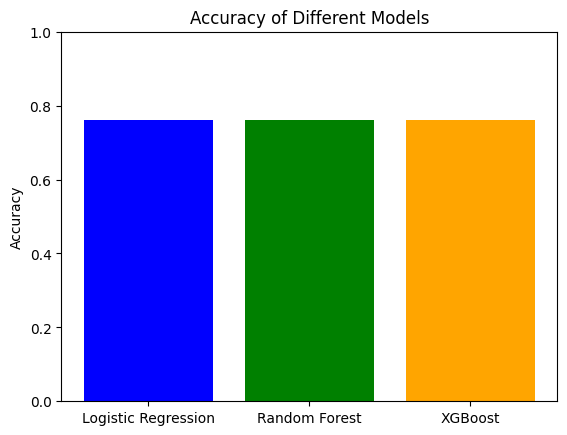

In [31]:
models = ['Logistic Regression', 'Random Forest', 'XGBoost']
accuracies = [accuracy_logistic, accuracy_rf, accuracy_xgboost]
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.show()